# 영화 리뷰 분류: 이진 분류 예제
- 리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류하기

## IMDB 데이터셋 로드하기

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words:훈련 데이터에서 가장 자주 나타나는 단어 만개만 사용

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
# 데이터 -> 영어단어
word_index = imdb.get_word_index()   # 단어와 정수 인덱스 매핑
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])   # 정수 인덱스와 단어를 매핑
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])   # 리뷰 디코딩
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 정수 시퀀스를 이진 행렬로 인코딩하기

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.    # 특정 인덱스의 위치를 1로 만듦
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')   # 훈련 데이터를 벡터로 변환
y_test = np.asarray(test_labels).astype('float32')   # 테스트 데이터를 벡터로 변환

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 모델 정의하기

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

## 모델 컴파일하기

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',  # 확률을 출력하는 모델은 binary_crossentropy가 적합
              metrics=['accuracy'])

## 옵티마이저 설정하기

In [19]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 손실과 측정을 함수 객체로 지정하기

In [20]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

## 검증 세트 준비하기

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 모델 훈련하기

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 117ms/step - loss: 0.5160 - acc: 0.7751 - val_loss: 0.3905 - val_acc: 0.8616
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3022 - acc: 0.9023 - val_loss: 0.3111 - val_acc: 0.8813
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2155 - acc: 0.9282 - val_loss: 0.3044 - val_acc: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1707 - acc: 0.9443 - val_loss: 0.2740 - val_acc: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1372 - acc: 0.9561 - val_loss: 0.3598 - val_acc: 0.8608
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1127 - acc: 0.9652 - val_loss: 0.3014 - val_acc: 0.8857
Epoch 7/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0947 - acc: 0.9717 - val_loss: 0.3127 - val_acc: 0.8818
Epoch 8/20
30/30 [==============================] - 2s 79ms/step - loss: 0.0735 - 

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## 훈련과 검증 손실 그리기

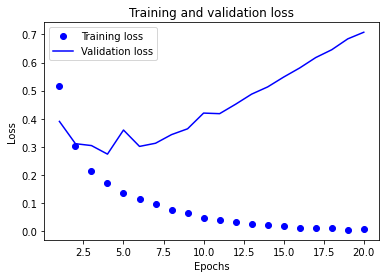

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 훈련과 검증 정확도 그리기
** overfitting ! **

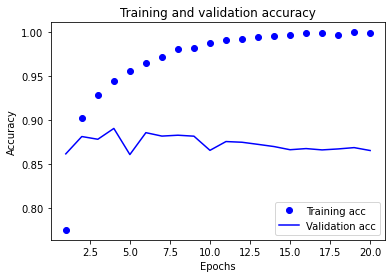

In [26]:
plt.clf()  # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 모델을 처음부터 다시 훈련하기

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 19ms/step - loss: 0.4618 - accuracy: 0.8244
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2678 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2045 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2891 - accuracy: 0.8851


In [29]:
results

[0.28914186358451843, 0.8850799798965454]

## 훈련된 모델로 새로운 데이터에 대해 예측하기

In [30]:
model.predict(x_test)

array([[0.20243591],
       [0.99994874],
       [0.80896175],
       ...,
       [0.12354934],
       [0.09932917],
       [0.5705727 ]], dtype=float32)

## 추가실험

In [32]:
# 층의 은닉 층 추가

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1425 - accuracy: 0.8149
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.0734 - accuracy: 0.9118
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0555 - accuracy: 0.9334
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0900 - accuracy: 0.8786


In [33]:
# 층의 은닉 층 감소

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1444 - accuracy: 0.8305
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0817 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.0633 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0920 - accuracy: 0.8762


In [35]:
# 층의 은닉 유닛 추가

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1379 - accuracy: 0.8127
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0701 - accuracy: 0.9124
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.0555 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0939 - accuracy: 0.8738


In [24]:
# binary_crossntropy -> mse

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1488 - accuracy: 0.8214
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0768 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0582 - accuracy: 0.9314
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.0897 - accuracy: 0.8784


In [25]:
# relu -> tanh

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4275 - accuracy: 0.8275
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2358 - accuracy: 0.9137
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1756 - accuracy: 0.9355
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3211 - accuracy: 0.8786
